In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from func2graph.data import data_simulator, generate_simulation_data

In [4]:
neuron_num = 10
dt = 0.001
tau = 0.025
total_time = 300

simulator = data_simulator(neuron_num=10, dt=0.001, tau=0.025)

result = []

for t in range(total_time):
    x_t = simulator.forward()
    x_t = x_t.view(-1, 1)
    result.append(x_t)

result = np.concatenate(result, axis=1)

print(result.shape)
print(result[0].shape)

(10, 300)
(300,)


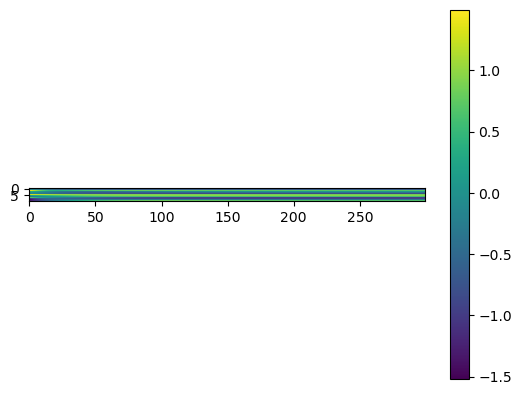

In [7]:
plt.imshow(result)
plt.colorbar()
plt.show()

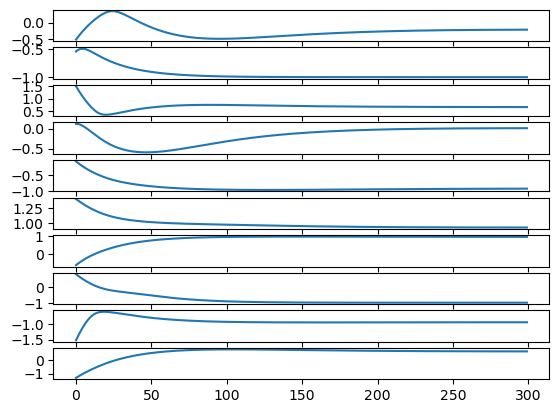

In [9]:
for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(result[i])

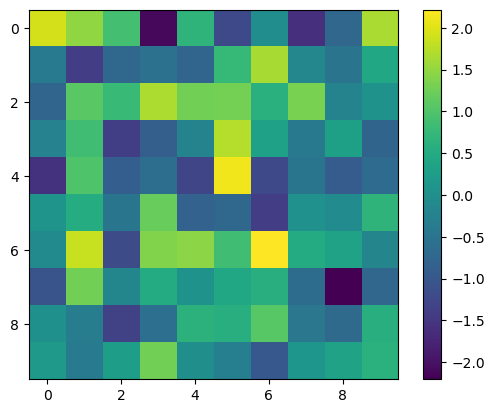

In [12]:
weight_matrix = simulator.W_ij

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

torch.Size([1000, 10, 300])


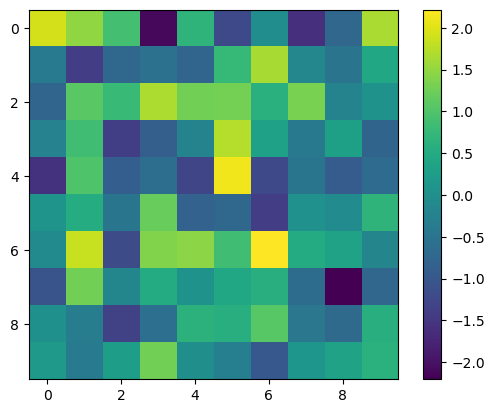

In [9]:
neuron_num = 10
dt = 0.001
tau = 0.025
total_time = 300

dataloader, weight_matrix = generate_simulation_data(neuron_num=neuron_num, dt=dt, tau=tau, total_time=total_time)

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

torch.Size([32, 10, 300])


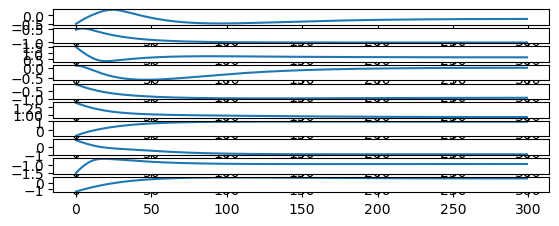

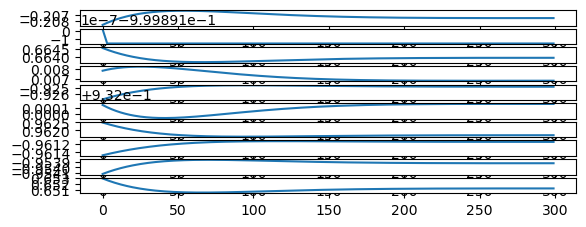

In [15]:
for i_batch, sample_batched in enumerate(dataloader):
    print(sample_batched[0].shape)
    samples = sample_batched[0][0:2]
    for i in range(neuron_num):
        plt.subplot(20, 1, i+1)
        plt.plot(samples[0][i])
    plt.show()
    for i in range(neuron_num):
        plt.subplot(20, 1, i+1)
        plt.plot(samples[1][i])
    plt.show()
    break